In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay



In [7]:
df = pd.read_csv(
    "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/real1_final.csv",
    delimiter='\t'
    )

/var/folders/h7/fr7g30_x5x12d68ww_s6w2_m0000gn/T/ipykernel_88053/1854008650.py:1: DtypeWarning: Columns (1,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/real1_final.csv",


In [22]:
filter_list = [elem for elem in df.columns if "FILTER" in elem]
df_niave = df[filter_list + ['is_snv']]
df_niave = df_niave.astype('int32')
# 1 is True and 0 is false
df_niave["sum_of_filters"] = df_niave[filter_list].sum(axis=1)
df_niave["niave_method_1"] = np.where(df_niave["sum_of_filters"] >= 2, 1, 0)

In [23]:
display(df_niave[df_niave.niave_method_1 == 1])

,FILTER_Mutect2,FILTER_Freebayes,FILTER_Vardict,FILTER_Varscan,is_snv,sum_of_filters,niave_method_1
16,1,0,0,1,0,2,1
17,1,0,0,1,0,2,1
19,1,0,1,1,0,3,1
29,1,0,0,1,0,2,1
86,0,1,0,1,0,2,1
...,...,...,...,...,...,...,...
49152,0,0,1,1,0,2,1
49196,1,0,1,0,0,2,1
49205,1,0,1,0,0,2,1
49209,1,0,1,0,0,2,1


In [26]:
y_true = np.array(df_niave.is_snv)
y_pred = np.array(df_niave.niave_method_1)

In [63]:
# Returns precision/recall/f1 score

# 'micro':
# Calculate metrics globally by counting the total true positives, false negatives and false positives.
# 'macro':
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
# 'weighted':
# Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

print(" Macro Precision : %5.2f, Recall : %5.2f, F1 : %5.2f" % precision_recall_fscore_support(y_true, y_pred, average='macro')[0:3] )
print(" Macro Precision : %5.2f, Recall : %5.2f, F1 : %5.2f" % precision_recall_fscore_support(y_true, y_pred, average='micro')[0:3] )
print(" Macro Precision : %5.2f, Recall : %5.2f, F1 : %5.2f" % precision_recall_fscore_support(y_true, y_pred, average='weighted')[0:3] )

 Macro Precision :  0.70, Recall :  0.94, F1 :  0.77
 Macro Precision :  0.96, Recall :  0.96, F1 :  0.96
 Macro Precision :  0.98, Recall :  0.96, F1 :  0.97


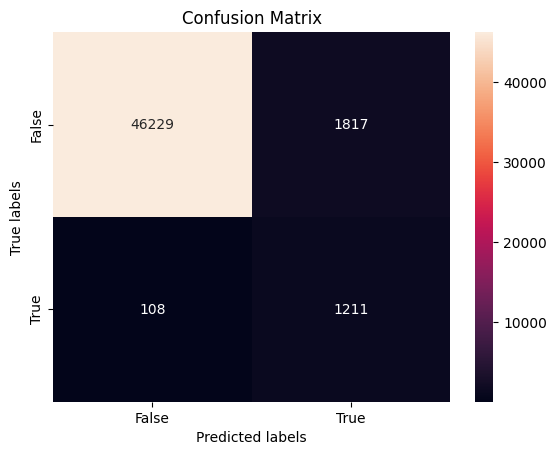

In [53]:
cm = confusion_matrix(y_true, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['False', 'True'])